In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                #transforms.Lambda(lambda x: x.repeat(3,1,1)),
                                transforms.Normalize((0.5, ), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

#### Here we can see an image

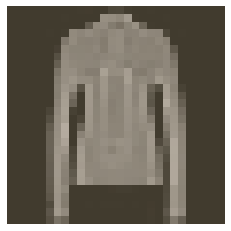

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

In [3]:
from torch import nn, optim
import torch.nn.functional as F

In [4]:
#Nwtwork Architecture:

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 =  nn.Linear(784,256)
        self.fc2 =  nn.Linear(256,128)
        self.fc3 =  nn.Linear(128,64)
        self.fc4 =  nn.Linear(64,10)
        
    def forward(self,x):
        x = x.view(x.shape[0],-1) ## flattening the Tensor
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim = 1)
        
        return x

## Train the network

In [8]:
#Defining the criterion and optimizer
model = Classifier()
criterion =  nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.005)

In [6]:
#Network Training
epochs = 5

for e in range(epochs):
    running_loss=0
    for images, labels in trainloader:
        logps = model(images)
        loss = criterion(logps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        
        print(f"Training loss:{running_loss}")

Training loss:492.01738072931767
Training loss:385.5489196628332
Training loss:353.07726637274027
Training loss:340.6592033356428
Training loss:320.50706647336483


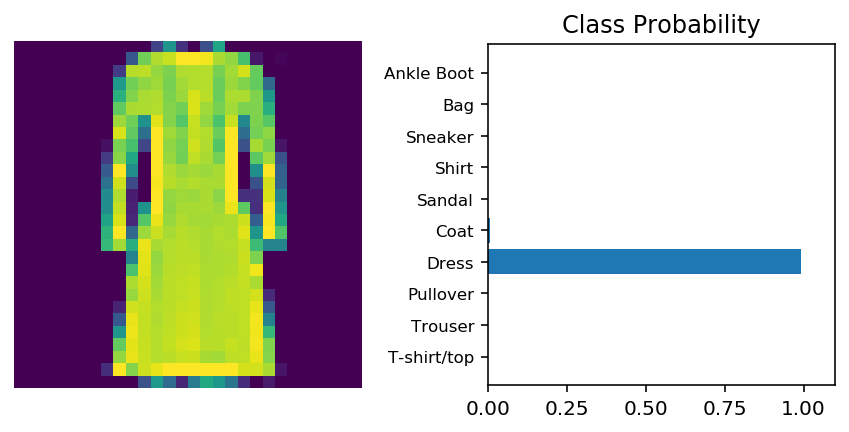

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

dataiter = iter(testloader)
images,lables = dataiter.next()
img =  images[2]

ps =  torch.exp(model(img)) #Class probabilities (softmax)

#Image and probabilities
helper.view_classify(img,ps,version = 'Fashion')